ch01_00000000000020500.jpg
205918 (11).jpg
366 (2).jpg
205917 (29).jpg
366 (24).jpg
C9_18.09.2020_12.28.50slot 9.jpg
25514 (44).jpg
C9_18.09.2020_11.25.11slot 9.jpg
C9_18.09.2020_11.41.53slot 9.jpg
C9_17.09.2020_13.33.44slot 11.jpg
C9_18.09.2020_18.14.01slot 4.jpg
C9_16.09.2020_10.50.40slot 9.jpg
369 (26).jpg
25513 (14).jpg
C9_18.09.2020_11.30.24slot 8.jpg
205915 (4).jpg
20599 (1).jpg
C9_18.09.2020_10.58.03slot 9.jpg
C9_18.09.2020_11.59.37slot 9.jpg
961 (1).jpg
365 (21).jpg
364 (21).jpg
366 (28).jpg
368 (10).jpg
25513 (3).jpg
2551 (5).jpg
25514 (48).jpg
C9_17.09.2020_14.29.01slot 11.jpg
20512 (3).jpg
368 (6).jpg
205913 (11).jpg
C9_16.09.2020_10.34.01slot 12.jpg
367 (12).jpg
ch01_00000000000002600.jpg
C9_22.09.2020_13.30.57slot 1.jpg
205915 (8).jpg
ch01_00000000000020700.jpg
20593 (7).jpg
20591 (28).jpg
20593 (6).jpg
C9_22.09.2020_11.39.56slot 1.jpg
ch01_00000000000002200.jpg
a170320a01cc33172a_2.jpg
C9_18.09.2020_11.26.14slot 8.jpg
C9_18.09.2020_11.32.30slot 10.jpg
C9_18.09.2020_11.28.

/Users/danghuutri/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/danghuutri/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/danghuutri/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/danghuutri/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warni

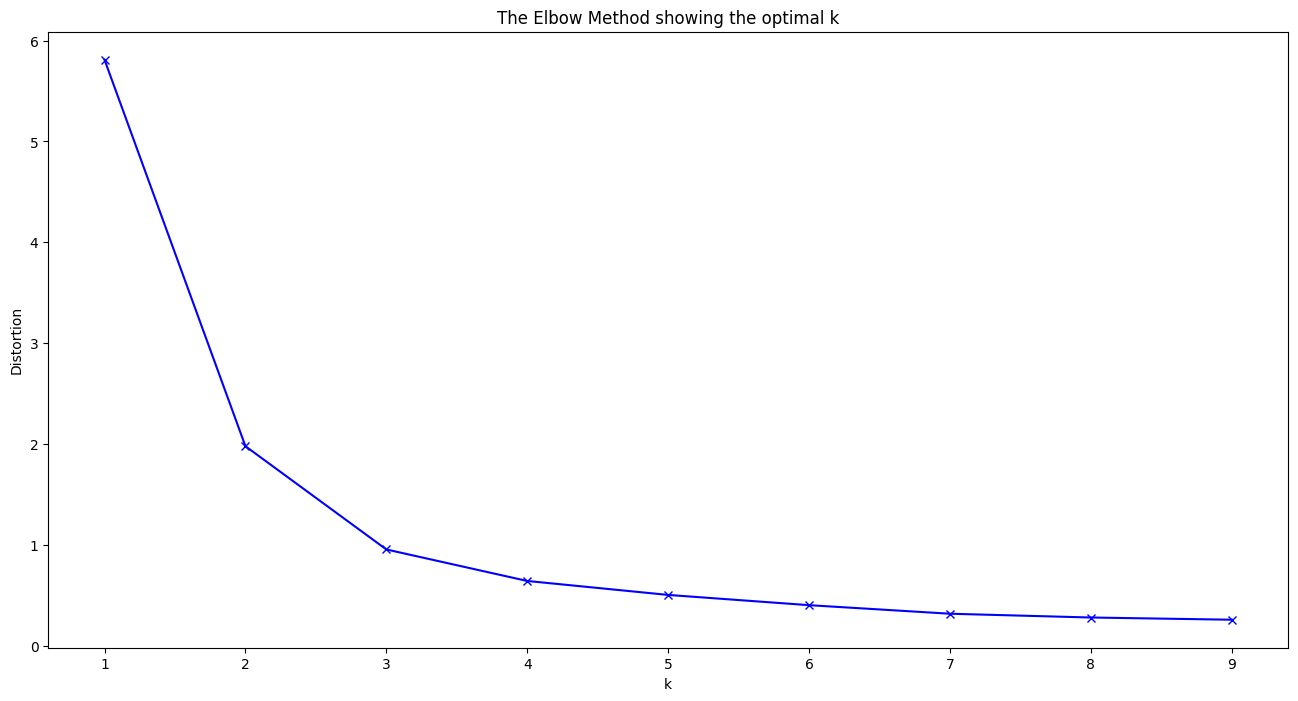

/Users/danghuutri/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


2  -  ch01_00000000000020500.jpg
2  -  205918 (11).jpg
3  -  366 (2).jpg
2  -  205917 (29).jpg
3  -  366 (24).jpg
0  -  C9_18.09.2020_12.28.50slot 9.jpg
0  -  25514 (44).jpg
3  -  C9_18.09.2020_11.25.11slot 9.jpg
3  -  C9_18.09.2020_11.41.53slot 9.jpg
0  -  C9_17.09.2020_13.33.44slot 11.jpg
0  -  C9_18.09.2020_18.14.01slot 4.jpg
3  -  C9_16.09.2020_10.50.40slot 9.jpg
3  -  369 (26).jpg
0  -  25513 (14).jpg
3  -  C9_18.09.2020_11.30.24slot 8.jpg
2  -  205915 (4).jpg
0  -  20599 (1).jpg
3  -  C9_18.09.2020_10.58.03slot 9.jpg
0  -  C9_18.09.2020_11.59.37slot 9.jpg
0  -  961 (1).jpg
3  -  365 (21).jpg
3  -  364 (21).jpg
1  -  366 (28).jpg
0  -  368 (10).jpg
0  -  25513 (3).jpg
0  -  2551 (5).jpg
0  -  25514 (48).jpg
0  -  C9_17.09.2020_14.29.01slot 11.jpg
3  -  20512 (3).jpg
3  -  368 (6).jpg
0  -  205913 (11).jpg
0  -  C9_16.09.2020_10.34.01slot 12.jpg
0  -  367 (12).jpg
2  -  ch01_00000000000002600.jpg
2  -  C9_22.09.2020_13.30.57slot 1.jpg
0  -  205915 (8).jpg
2  -  ch01_000000000000207

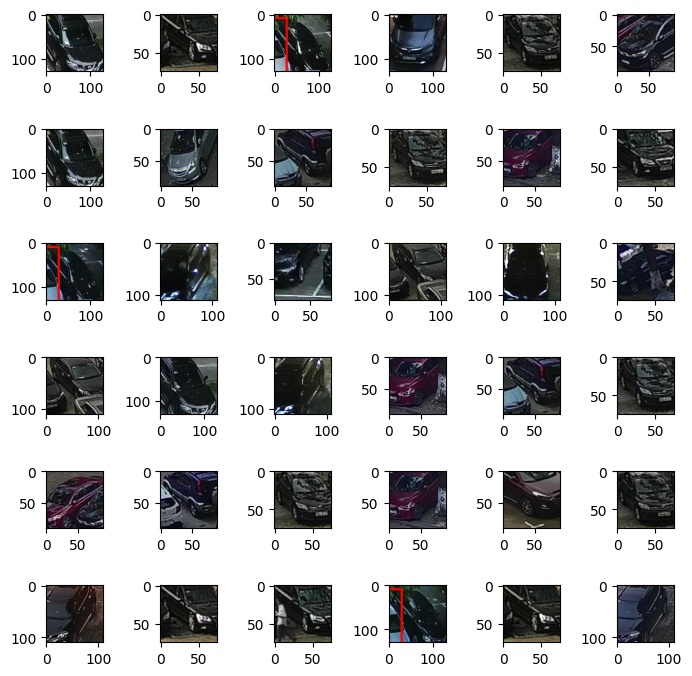

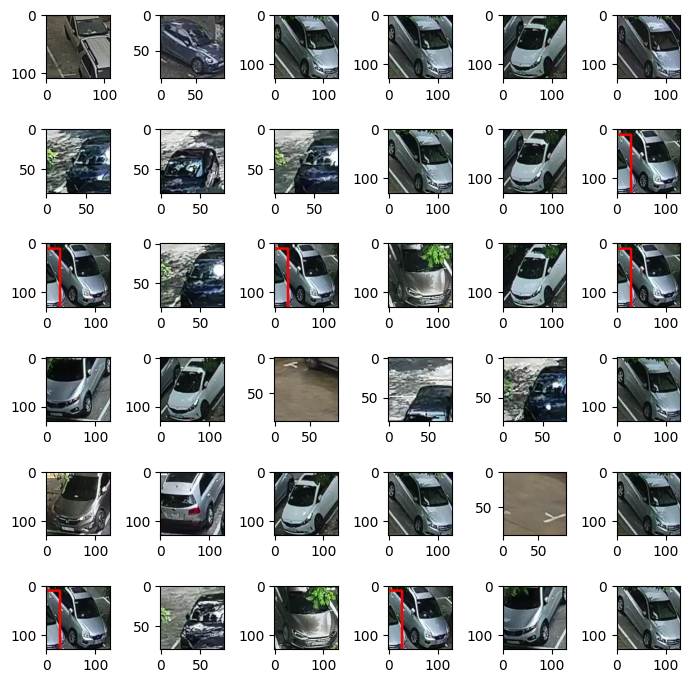

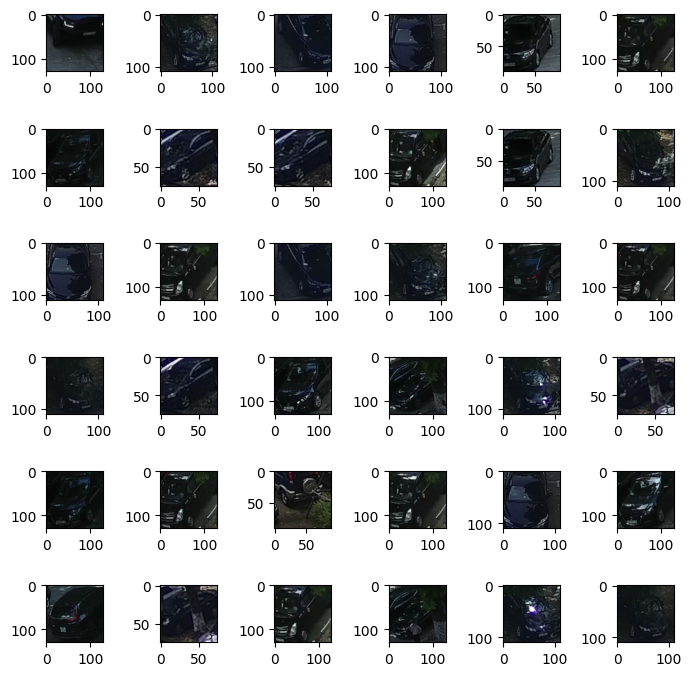

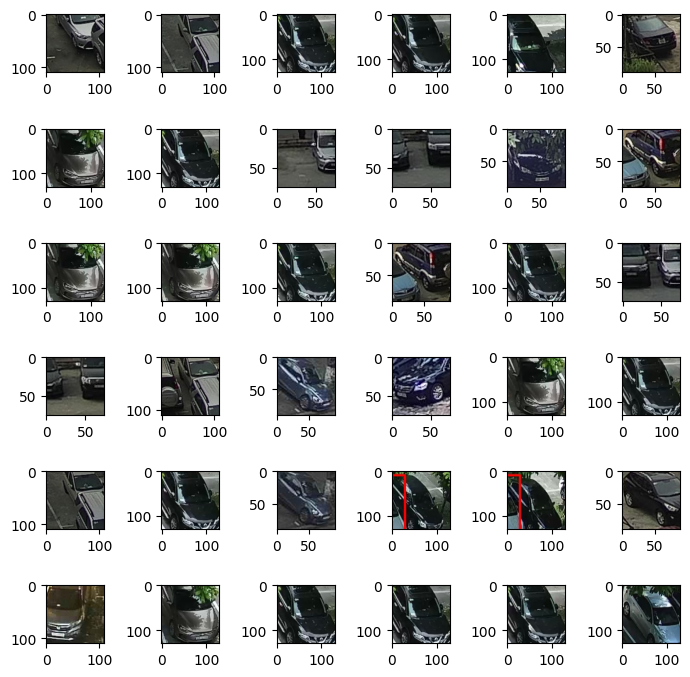

In [1]:
import cv2
from sklearn.cluster import KMeans
import os
import numpy as np
import pickle
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

c_data_path = "Busy/1"

def get_feature(img):
    intensity = img.sum(axis=1)
    intensity = intensity.sum(axis=0) / (255 * img.shape[0] * img.shape[1])
    return intensity



def load_data(data_path=c_data_path):

    try:
        with open('data.pickle', 'rb') as handle:
            X = pickle.load(handle)
        with open('label.pickle', 'rb') as handle:
            L = pickle.load(handle)
        return X,L
    except:
        X = []
        L = []
        for file in os.listdir(data_path):
            print(file)
            c_x = get_feature(cv2.imread(os.path.join(data_path, file)))
            X.append(c_x)
            L.append(file)

        X = np.array(X)
        L = np.array(L)
        with open('data.pickle', 'wb') as handle:
            pickle.dump(X, handle, protocol=pickle.HIGHEST_PROTOCOL)
        with open('label.pickle', 'wb') as handle:
            pickle.dump(L, handle, protocol=pickle.HIGHEST_PROTOCOL)

        return X,L


# Print the shape of the imag
X,L = load_data()
print(X.shape)

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()
#
# from yellowbrick.cluster import SilhouetteVisualizer
#
# fig, ax = plt.subplots(2, 2, figsize=(15,8))
# for i in [2, 3, 4, 5]:
#     '''
#     Create KMeans instance for different number of clusters
#     '''
#     km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
#     q, mod = divmod(i, 2)
#     '''
#     Create SilhouetteVisualizer instance with KMeans instance
#     Fit the visualizer
#     '''
#     visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
#     visualizer.fit(X)
#
# visualizer.show()
#
# # #
kmeans = KMeans(n_clusters=4).fit(X)
for i in range(len(kmeans.labels_)):
    print(kmeans.labels_[i]," - ", L[i])
print(kmeans.cluster_centers_)
#
# from sklearn.metrics import silhouette_score, silhouette_samples
#
# score = silhouette_score(X, kmeans.labels_, metric='euclidean')
# print("Silhoutte =", score)
#
n_row = 6
n_col=6
for i in range(4):
    _, axs = plt.subplots(n_row, n_col, figsize=(7, 7))
    axs = axs.flatten()
    for img, ax in zip(L[ kmeans.labels_ == i][:36], axs):
        ax.imshow(mpimg.imread(os.path.join(c_data_path,img)))
    plt.tight_layout()
    plt.show()